# Red neuronal CNN

Esta red consiste en que tenemos un dataset que tienen distintos rostros de distintas personas con una cierta expresión. Estas estan divididas en enojo, miedo, felicidad, tristeza, sorpresa. La idea de la misma consiste en clasificar las entradas en alguna de estas categorias.

Primero hacemos import de las librerias necesarias

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps

Ahora hacemos la importación de la data que esta en la carpeta de datasets y por medio de la funcion de keras de image_dataset_from_directory() cargamos en memoria las imágenes.

El tamaño de las imágenes se pone a 64 x 64 dado a que el tamaño de las imágenes medio es cercano ese valor (48 x 48), por lo que con ese tamaño tomamos en cuenta la mayoria de escenarios de nuestro dataset y aun nos da posibilidad de obtener información de las imágenes que tengan un mayor tamaño.

Otro parametro interesante es el label_mode dado a que el dataset esta en carpetas de las categorias, por lo que permite establecer las entradas de las imágenes a cierta categoria.

El batch_size consiste en cuantas imágenes estaremos agregando en memoria a la vez, cabe mencionar que no tiene nada que ver al batch_size del entrenamiento.

Tambien con image_dataset_from_directory() permite definir de una sola vez la x y la y, poque devuelve ambos valores.

In [26]:
DATASET_DIR = 'datasets'
IMG_WIDTH=64
IMG_HEIGHT=64
SEED=281
VALIDATION_SPLIT=0.2
BATCH_SIZE=64

train_ds = keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

val_ds = keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

print("Conteo de imagenes por tipo")
class_names = train_ds.class_names
image_counts = defaultdict(int)
for class_name in class_names:
    class_dir = os.path.join(DATASET_DIR, class_name)
    if os.path.isdir(class_dir):
        count = len(os.listdir(class_dir))
        image_counts[class_name] = count
        print(f"{class_name}: {count} images")



Found 59078 files belonging to 5 classes.
Using 47263 files for training.
Found 59078 files belonging to 5 classes.
Using 11815 files for validation.
Conteo de imagenes por tipo
Angry: 10148 images
Fear: 9732 images
Happy: 18439 images
Sad: 12552 images
Suprise: 8207 images


Ahora, podemos definir el modelo, el cual se explica a continuación:

- La entrada es de las imagenes convertidas, con 3 filas que representan las capas de color
- Se aplica una capa de rescalamiento, para la normalización de las imágenes, siendo los 255, los valores de los pixeles en cada capa de color.
- Luego se tienen capas de convolución 2D con funcion relu de activación de 32 a 128 neuronas para ir tomando los elementos de la imagen de los mas pequeños a los mas grandes
- Luegos estan las capas de MaxPooling para hacer las operaciones convulocionales y se establecen de 2x2
- Luego hay una capa de droput para evitar el overfittig
- Luego una capar Flattern, para vectorizar las salidas de las imágenes
- Por úlitmo una capa de salida softmax que permite darnos una salida con las probabilidades de cada una de la clasificación de la imagen a verificar

Con respecto a la compilacion:

- Optimizador Adam
- Función de perdida crossnetropy

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Ahora se procede con el proceso de entranamiento, y se define con una función callback que permite cancelar el proceso si se nota que no existe un ajuste en 5 epoch seguidas.

Luego se procesde a grabar el modelo y a graficar los resultados

Epoch 1/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.4765 - loss: 1.2719 - val_accuracy: 0.5499 - val_loss: 1.1078
Epoch 2/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.5720 - loss: 1.0670 - val_accuracy: 0.6096 - val_loss: 0.9797
Epoch 3/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.6171 - loss: 0.9656 - val_accuracy: 0.6459 - val_loss: 0.9020
Epoch 4/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.6513 - loss: 0.8898 - val_accuracy: 0.6712 - val_loss: 0.8452
Epoch 5/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.6798 - loss: 0.8180 - val_accuracy: 0.6818 - val_loss: 0.8078
Epoch 6/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.7098 - loss: 0.7496 - val_accuracy: 0.7094 - val_loss: 0.7635
Epoch 7/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.7337 - loss: 0.6926 - val_accuracy: 0.7264 - val_loss: 0.7220
Epoch 8/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.7596 - loss: 0.6278 - 

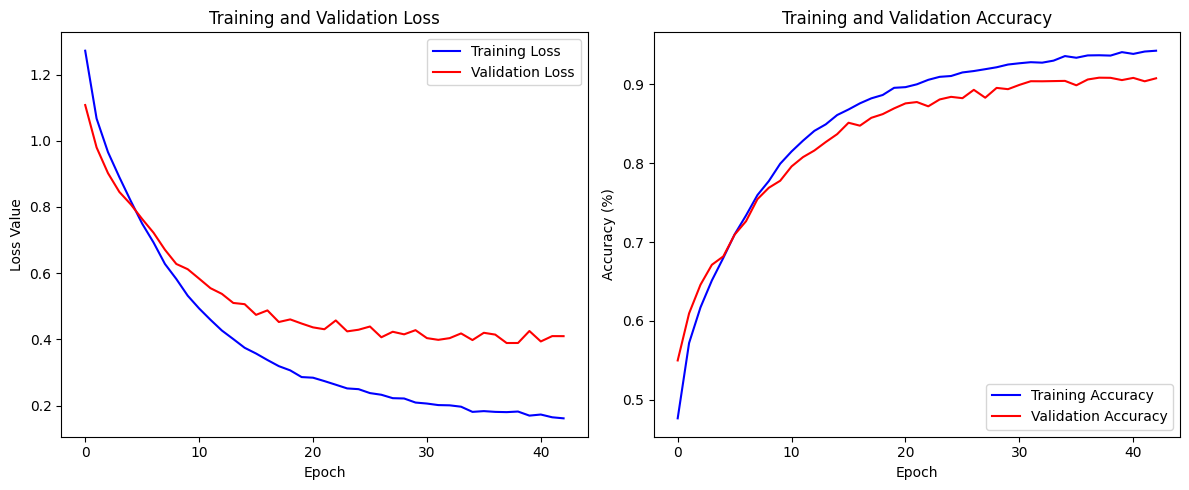

In [ ]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stop]
)
model.save('cnn_model.keras')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(12, 5))

# --- Plot 1: Loss ---
plt.subplot(1, 2, 1) # 1 row, 2 columns, plot 1
plt.plot(epochs_range, loss, label='Training Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')

# --- Plot 2: Accuracy ---
plt.subplot(1, 2, 2) # 1 row, 2 columns, plot 2
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='red')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

Ahora procedemos a hacer una prueba del modelo, con imagenes sacadas de internet de la carpeta test

In [34]:
TEST_DIR = 'test'

def load_and_preprocess(fp, target_size=(IMG_WIDTH, IMG_HEIGHT), keep_aspect=True):
    img = Image.open(fp).convert('RGB')
    if keep_aspect:
        # pad to target_size preserving aspect ratio (black pad)
        img = ImageOps.pad(img, target_size, method=Image.BILINEAR, color=(0,0,0))
    else:
        img = img.resize(target_size, Image.BILINEAR)
    arr = np.array(img)            # range 0..255
    return arr

class_names = train_ds.class_names
files = [f for f in sorted(os.listdir(TEST_DIR)) if f.lower().endswith(('.jpg','.jpeg','.png'))]
for fn in files:
    fp = os.path.join(TEST_DIR, fn)
    arr = load_and_preprocess(fp)
    arr = np.expand_dims(arr, 0)   # batch dim
    probs = model.predict(arr, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    print(f"{fn} -> {class_names[pred_idx]} ({probs[pred_idx]:.3f})")


angry.png -> Angry (0.650)
fear.png -> Angry (0.999)
happy.png -> Suprise (0.958)
sad.png -> Sad (0.931)
surprise.png -> Angry (0.751)
